Portfolio Expected Return - The expected return of a portfolio is calculated by multiplying the weight of the asset by its return and summing the values of all the assets together. To introduce a forward looking estimate, probability may be introduced to generate and incorporate features in business and economy.

Best performing Mutual Funds over 4 years in the US -create portfolio.
Reduced selection in this exercise.

Western Asset SMASh Series C Fund (LMLCX) , Spirit of America Income A (SOAIX), DFA Short-Duration Real Return Instl (DFAIX) ,Buffalo High-Yield (BUFHX) ,Baron Real Estate Income Institutional (BRIIX),Fidelity Advisor Technology A (FADTX), Fidelity Select Health Care Svcs Port (FSHCX) ,,DFA US Large Cap Growth Instl (DUSLX),Amana Mutual Funds Trust - Growth Fund (AMAGX),TIAA-CREF Short Duration Impact Bond Fund - Institutional Class (TSDJX)

Portfolio variance is used as the measure of risk in this model. A higher variance will indicate a higher risk for the asset class and the portfolio.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf

import seaborn as sns
import matplotlib.pyplot as mp

LOAD DATA FROM YAHOO FINANCE

In [2]:
# Read Data
Stocks = yf.download(' LMLCX BRIIX SOAIX DFAIX BUFHX FADTX DUSLX FSHCX AMAGX TSDJX ',start='2017-10-01', end='2021-10-01')
Stocks.tail()


[*********************100%***********************]  10 of 10 completed


Adj Close                                                         \
                AMAGX      BRIIX      BUFHX      DFAIX      DUSLX      FADTX   
Date                                                                           
2021-09-24  67.856331  16.192118  10.933353  10.406394  29.428259  93.750877   
2021-09-27  67.020691  16.045715  10.933353  10.416296  29.252872  92.636269   
2021-09-28  65.170334  15.928593  10.915102  10.416296  28.615936  89.531288   
2021-09-29  65.110641  15.948112  10.924229  10.416296  28.707615  89.142059   
2021-09-30  64.284950  15.723629  10.924229  10.416296  28.327934  88.858978   

                                                       ... Volume              \
                 FSHCX     LMLCX      SOAIX     TSDJX  ...  AMAGX BRIIX BUFHX   
Date                                                   ...                      
2021-09-24  118.585464  9.241753  11.856499  9.964914  ...      0   0.0     0   
2021-09-27  118.859756  9.232275  11.865901  9.955182  ...      0   0.0     0   
2021-09-28  117.076866  9.194360  11.790680  9.955182  ...      0   0.0     0   
2021-09-29  117.479164  9.213316  11.828290  9.964914  ...      0   0.0     0   
2021-09-30  114.964813  9.184882  11.798086  9.976605  ...      0   0.0     0   

                                                      
           DFAIX DUSLX FADTX FSHCX LMLCX SOAIX TSDJX  
Date                                                  
2021-09-24     0     0     0     0     0     0   0.0  
2021-09-27     0     0     0     0     0     0   0.0  
2021-09-28     0     0     0     0     0     0   0.0  
2021-09-29     0     0     0     0     0     0   0.0  
2021-09-30     0     0     0     0     0     0   0.0  

[5 rows x 60 columns]

In [3]:
#Closing price
Stocks = Stocks['Adj Close']
print (Stocks)

                AMAGX      BRIIX      BUFHX      DFAIX      DUSLX      FADTX  \
Date                                                                           
2017-10-02  28.943457        NaN   8.622600   9.151063  14.896198  33.119770   
2017-10-03  29.015100        NaN   8.622600   9.160233  14.929639  33.355347   
2017-10-04  29.054897        NaN   8.622600   9.169401  14.954718  33.337223   
2017-10-05  29.134501        NaN   8.622600   9.169401  15.013230  33.609043   
2017-10-06  29.150421        NaN   8.622600   9.160233  14.996513  33.760056   
2017-10-09  29.142460        NaN   8.622600   9.169401  14.988155  33.723816   
2017-10-10  29.126543        NaN   8.614990   9.169401  15.021590  33.820465   
2017-10-11  29.261864        NaN   8.614990   9.178571  15.046666  33.965431   
2017-10-12  29.301666        NaN   8.614990   9.178571  15.055028  34.013756   
2017-10-13  29.333509        NaN   8.614990   9.178571  15.080108  34.134563   
2017-10-16  29.325548        NaN   8.614

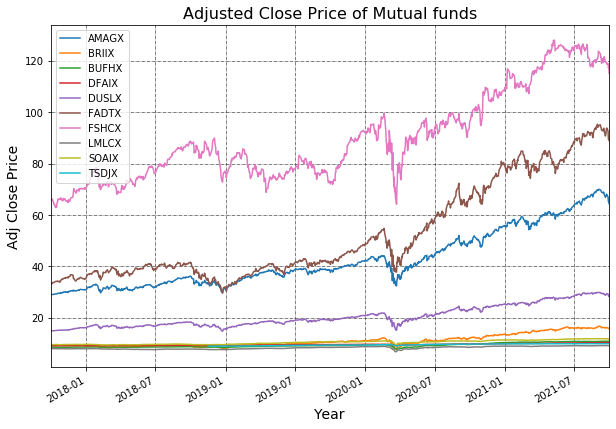

In [4]:
# Plot the adjusted close price
Stocks.plot(figsize=(10, 7))
# Define the label for the title of the figure
plt.title("Adjusted Close Price of Mutual funds" % Stocks, fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Adj Close Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
# Show the plot
plt.show()

In [5]:
# Log of percentage change of all stocks in the list 
Ret= Stocks.pct_change().apply(lambda x: np.log(1+x)) # CONVERT TO RETURN
Ret.head()


,AMAGX,BRIIX,BUFHX,DFAIX,DUSLX,FADTX,FSHCX,LMLCX,SOAIX,TSDJX
Date,,,,,,,,,,
2017-10-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-03,0.002472,NaN,0.0,0.001002,0.002242,0.007088,0.004982,0.00101,0.000830,NaN
2017-10-04,0.001371,NaN,0.0,0.001000,0.001678,-0.000543,-0.000864,0.00000,0.000830,NaN
2017-10-05,0.002736,NaN,0.0,0.000000,0.003905,0.008121,-0.004335,0.00000,-0.000830,NaN
2017-10-06,0.000546,NaN,0.0,-0.001000,-0.001114,0.004483,-0.003699,0.00000,-0.001661,NaN


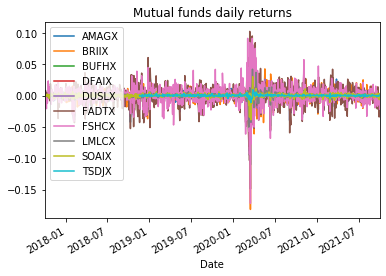

In [6]:
Ret.plot(title='Mutual funds daily returns')

# Calculating the Mean, standard deviation and other stats

In [7]:
Ann_Ret = Ret.mean()*252
print (Ann_Ret)


AMAGX    0.199892
BRIIX    0.142523
BUFHX    0.059267
DFAIX    0.032440
DUSLX    0.161005
FADTX    0.247221
FSHCX    0.139031
LMLCX    0.033578
SOAIX    0.051623
TSDJX    0.036410
dtype: float64


In [8]:
Ann_Risk = Ret.std()*(252)**(0.5)
print(Ann_Risk)


AMAGX    0.201626
BRIIX    0.230936
BUFHX    0.050823
DFAIX    0.017310
DUSLX    0.195781
FADTX    0.271983
FSHCX    0.258019
LMLCX    0.072555
SOAIX    0.050347
TSDJX    0.020847
dtype: float64


# Calculating the correlation and covariance using pandas

In [9]:
Ret_Corr = Ret.corr()
print(Ret_Corr)


          AMAGX     BRIIX     BUFHX     DFAIX     DUSLX     FADTX     FSHCX  \
AMAGX  1.000000  0.793576  0.634544  0.159876  0.892877  0.940757  0.754654   
BRIIX  0.793576  1.000000  0.698963  0.209765  0.704101  0.725291  0.722817   
BUFHX  0.634544  0.698963  1.000000  0.493197  0.618620  0.591703  0.588780   
DFAIX  0.159876  0.209765  0.493197  1.000000  0.279097  0.137739  0.165662   
DUSLX  0.892877  0.704101  0.618620  0.279097  1.000000  0.842837  0.699406   
FADTX  0.940757  0.725291  0.591703  0.137739  0.842837  1.000000  0.669596   
FSHCX  0.754654  0.722817  0.588780  0.165662  0.699406  0.669596  1.000000   
LMLCX  0.550490  0.623646  0.807958  0.504160  0.545067  0.492294  0.515466   
SOAIX  0.390475  0.523271  0.650436  0.494918  0.428786  0.348089  0.393637   
TSDJX  0.033570  0.076667  0.367776  0.487502  0.109892  0.014934  0.051372   

          LMLCX     SOAIX     TSDJX  
AMAGX  0.550490  0.390475  0.033570  
BRIIX  0.623646  0.523271  0.076667  
BUFHX  0.807958 

In [10]:
Ret_Covar = Ret.cov()
print(Ret_Covar)

              AMAGX     BRIIX     BUFHX         DFAIX     DUSLX         FADTX  \
AMAGX  1.613209e-04  0.000151  0.000026  2.214310e-06  0.000140  2.047216e-04   
BRIIX  1.508242e-04  0.000212  0.000034  3.384026e-06  0.000130  1.853378e-04   
BUFHX  2.580271e-05  0.000034  0.000010  1.721821e-06  0.000024  3.245660e-05   
DFAIX  2.214310e-06  0.000003  0.000002  1.189101e-06  0.000004  2.573404e-06   
DUSLX  1.398642e-04  0.000130  0.000024  3.753482e-06  0.000152  1.780961e-04   
FADTX  2.047216e-04  0.000185  0.000032  2.573404e-06  0.000178  2.935498e-04   
FSHCX  1.557919e-04  0.000175  0.000031  2.936183e-06  0.000140  1.864683e-04   
LMLCX  3.195667e-05  0.000043  0.000012  2.512720e-06  0.000031  3.855066e-05   
SOAIX  1.572933e-05  0.000025  0.000007  1.711646e-06  0.000017  1.891484e-05   
TSDJX  6.088567e-07  0.000002  0.000002  7.680133e-07  0.000002  3.631739e-07   

          FSHCX     LMLCX     SOAIX         TSDJX  
AMAGX  0.000156  0.000032  0.000016  6.088567e-07  
BRII

# CREATE PORTFOLIO- 10 stocks for mthe original list of best performers.

In [11]:
# Import data
df = yf.download('LMLCX BRIIX SOAIX DFAIX BUFHX',start='2017-10-01', end='2021-10-01')
df.tail()


[*********************100%***********************]  5 of 5 completed


Adj Close                                                 Close  \
                BRIIX      BUFHX      DFAIX     LMLCX      SOAIX      BRIIX   
Date                                                                          
2021-09-24  16.192118  10.933352  10.406394  9.241755  11.856498  16.590000   
2021-09-27  16.045715  10.933352  10.416296  9.232276  11.865900  16.440001   
2021-09-28  15.928592  10.915101  10.416296  9.194361  11.790682  16.320000   
2021-09-29  15.948112  10.924228  10.416296  9.213317  11.828290  16.340000   
2021-09-30  15.723631  10.924228  10.416296  9.184881  11.798086  16.110001   

                                       ...       Open                      \
            BUFHX  DFAIX LMLCX  SOAIX  ...      BRIIX  BUFHX  DFAIX LMLCX   
Date                                   ...                                  
2021-09-24  11.98  10.51  9.75  12.61  ...  16.590000  11.98  10.51  9.75   
2021-09-27  11.98  10.52  9.74  12.62  ...  16.440001  11.98  10.52  9.74   
2021-09-28  11.96  10.52  9.70  12.54  ...  16.320000  11.96  10.52  9.70   
2021-09-29  11.97  10.52  9.72  12.58  ...  16.340000  11.97  10.52  9.72   
2021-09-30  11.97  10.52  9.69  12.50  ...  16.110001  11.97  10.52  9.69   

                  Volume                          
            SOAIX  BRIIX BUFHX DFAIX LMLCX SOAIX  
Date                                              
2021-09-24  12.61    0.0     0     0     0     0  
2021-09-27  12.62    0.0     0     0     0     0  
2021-09-28  12.54    0.0     0     0     0     0  
2021-09-29  12.58    0.0     0     0     0     0  
2021-09-30  12.50    0.0     0     0     0     0  

[5 rows x 30 columns]

In [12]:
# Closing price
df = df['Adj Close']
df.head()


,BRIIX,BUFHX,DFAIX,LMLCX,SOAIX
Date,,,,,
2017-10-02,NaN,8.622602,9.151062,8.032630,9.600887
2017-10-03,NaN,8.622602,9.160233,8.040752,9.608862
2017-10-04,NaN,8.622602,9.169400,8.040752,9.616837
2017-10-05,NaN,8.622602,9.169400,8.040752,9.608862
2017-10-06,NaN,8.622602,9.160233,8.040752,9.592913


In [13]:
# Log of percentage change and creeate Covariance matrix
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix


,BRIIX,BUFHX,DFAIX,LMLCX,SOAIX
BRIIX,0.000212,0.000034,0.000003,0.000043,0.000025
BUFHX,0.000034,0.000010,0.000002,0.000012,0.000007
DFAIX,0.000003,0.000002,0.000001,0.000003,0.000002
LMLCX,0.000043,0.000012,0.000003,0.000021,0.000008
SOAIX,0.000025,0.000007,0.000002,0.000008,0.000010


In [14]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

,BRIIX,BUFHX,DFAIX,LMLCX,SOAIX
BRIIX,1.000000,0.698963,0.209767,0.623645,0.523267
BUFHX,0.698963,1.000000,0.493198,0.807957,0.650434
DFAIX,0.209767,0.493198,1.000000,0.504162,0.494916
LMLCX,0.623645,0.807957,0.504162,1.000000,0.565667
SOAIX,0.523267,0.650434,0.494916,0.565667,1.000000


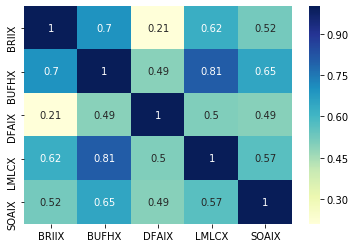

In [15]:
# plotting correlation heatmap
dataplot = sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
  
# displaying heatmap
mp.show()

In [16]:
# Randomly weighted portfolio's variance NTES SBAC AMT DXCM ISRG NVDA DECK ODFL ALGN MSFT
w = {'LMLCX ':0.20 ,'BRIIX':0.20 , 'SOAIX ':0.20 , 'DFAIX':0.20 ,'BUFHX' :0.20 , }
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
Ann_port_std = (port_var*252)**(0.5)
print (port_var)
print (port_var*252)

1.2013579447263085e-05
0.0030274220207102973


In [17]:
Ann_port_std


0.05502201396450604

In [18]:
# Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

BRIIX    0.156517
BUFHX    0.061047
DFAIX    0.031863
LMLCX    0.036755
SOAIX    0.050151
dtype: float64

In [19]:
# Portfolio returns
w = [0.20,0.20,0.20,0.20,0.20]
port_er = (w*ind_er).sum()
port_er



0.06726688003675284

Plotting the efficient frontier This is the aim of going through all the topics above, to plot the efficient frontier. Efficient frontier is a graph with ‘returns’
on the Y-axis and ‘volatility’ on the X-axis. It shows us the maximum return we can get for a set level of volatility, or conversely, the volatility that we
need to accept for certain level of returns.
The plot of efficient frontier looks something like the digram shown in class:
Efficient Frontier
Below, you can see the calculations and code for finding the optimal weights of assets and plotting the efficient frontier for given portfolio. But first,
lets take a look at the volatiltilty and returns of individual assets for a better understanding.

In [20]:
# Volatility is given by the annual standard deviation. We multiply by 252 because there are 252 trading days/year
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(252))
ann_sd

BRIIX    0.230936
BUFHX    0.050823
DFAIX    0.017311
LMLCX    0.072555
SOAIX    0.050347
dtype: float64

In [21]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets


,Returns,Volatility
BRIIX,0.156517,0.230936
BUFHX,0.061047,0.050823
DFAIX,0.031863,0.017311
LMLCX,0.036755,0.072555
SOAIX,0.050151,0.050347


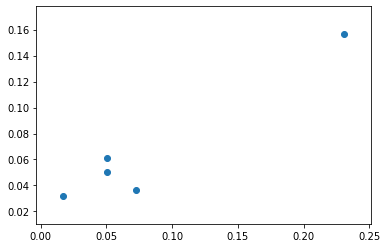

In [22]:
import matplotlib.pyplot as plt
x = ann_sd # RISK
y = ind_er # Return
plt.scatter(x, y)
plt.show()

Next, to plot the graph of efficient frontier, we need run a loop. In each iteration, the loop considers different weights for assets and calculates the
return and volatility of that particular portfolio combination.
We run this loop a 10000 times.
To get random numbers for weights, we use the np.random.random() function. But remember that the sum of weights must be 1, so we divide those
weights by their cumulative sum. Keep reading further to see how it’s done.

In [23]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights
num_assets = len(df.columns)
num_portfolios = 10000


In [24]:
for portfolio in range(num_portfolios):
 weights = np.random.random(num_assets)
 weights = weights/np.sum(weights)
 p_weights.append(weights)
 returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
 # weights 
 p_ret.append(returns)
 var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum() # Portfolio Variance
 sd = np.sqrt(var) #Daily standard deviation
 ann_sd = sd*np.sqrt(252) #Annual standard deviation = volatility
 p_vol.append(ann_sd)

In [25]:
data = {'Returns':p_ret, 'Volatility':p_vol}
for counter, symbol in enumerate(df.columns.tolist()):
 #print(counter, symbol)
 data[symbol+' weight'] = [w[counter] for w in p_weights]
portfolios = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created


,Returns,Volatility,BRIIX weight,BUFHX weight,DFAIX weight,LMLCX weight,SOAIX weight
0,0.047904,0.050033,0.038904,0.198865,0.208393,0.353901,0.199937
1,0.059483,0.051004,0.116343,0.416612,0.388383,0.035818,0.042844
2,0.059257,0.056769,0.054255,0.657194,0.067498,0.193430,0.027622
3,0.071500,0.077987,0.237246,0.196585,0.221180,0.148044,0.196945
4,0.080718,0.099490,0.313944,0.193160,0.071491,0.270500,0.150905


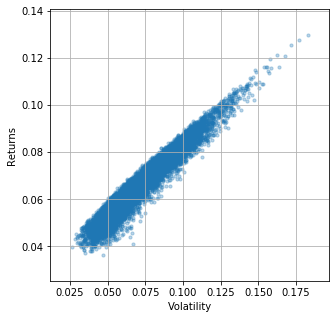

In [26]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[5,5])


In [27]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified. 
min_vol_port


Returns         0.039683
Volatility      0.026098
BRIIX weight    0.010139
BUFHX weight    0.158673
DFAIX weight    0.666138
LMLCX weight    0.081622
SOAIX weight    0.083428
Name: 1958, dtype: float64

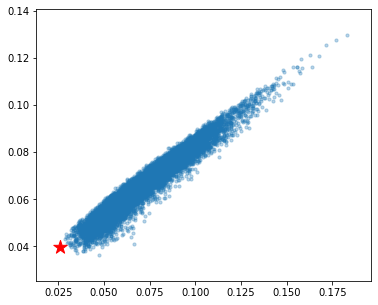

In [28]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[6,5])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=200)


Sharpe Ratio The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. Volatility is a measure of the price
fluctuations of an asset or portfolio.
The risk-free rate of return is the return on an investment with zero risk, meaning it’s the return investors could expect for taking no risk.
The optimal risky portfolio is the one with the highest Sharpe ratio.
Optimal Risky Portfolio An optimal risky portfolio can be considered as one that has highest Sharpe ratio.
Let’s find out.

In [29]:
# Finding the optimal portfolio
rf = 0.05 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns         0.119664
Volatility      0.157685
BRIIX weight    0.623252
BUFHX weight    0.310531
DFAIX weight    0.002474
LMLCX weight    0.008831
SOAIX weight    0.054912
Name: 7841, dtype: float64

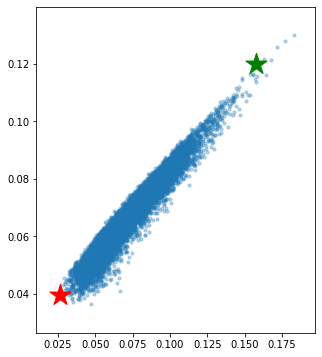

In [30]:
# Plotting optimal portfolio
plt.subplots(figsize=(5, 6))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)